# Testing qipQST

In [208]:
%load_ext autoreload

%autoreload 2
import qipQST as qst
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
tau = 0.25

In [210]:
xpi2 = qst.ConstantPulse(1/4, 1, 1, 0)
XPi2Gate = qst.QuantumGate()
XPi2Gate.appendPulse(xpi2)

ypi2 = qst.ConstantPulse(1/4, 1, 1, np.pi/2)
YPi2Gate = qst.QuantumGate()
YPi2Gate.appendPulse(ypi2)

idlePulse = qst.ConstantPulse(tau, 0, 1, 0)
idleGate = qst.QuantumGate()
idleGate.appendPulse(idlePulse)

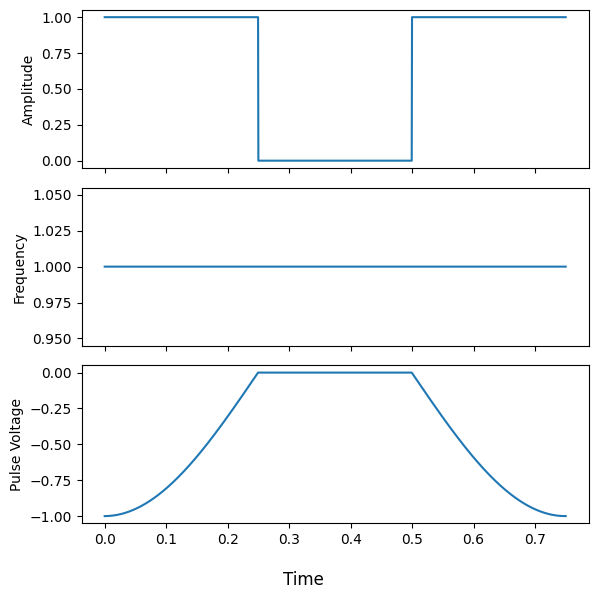

In [211]:
ramseyCircuit = qst.QuantumCircuit(0)
ramseyCircuit.appendGate(XPi2Gate)
ramseyCircuit.appendGate(idleGate)
ramseyCircuit.appendGate(YPi2Gate)
ramseyCircuit.plotCircuitWaveform()

In [212]:
testSimulator = qst.PulseSimulator()
testSimulator.setQubit(qst.Qubit(0))
testSimulator.setCircuit(ramseyCircuit)
testSimulator.setTimeSteps(1, 10000)

In [213]:
testResult = testSimulator.simulateCircuit(1, 10000)

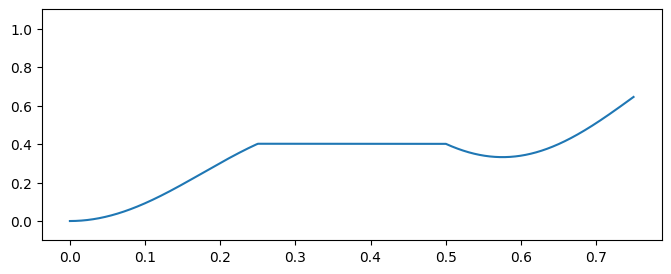

In [214]:

testResult.plotStates()